
# Glass Classification — Full ML Pipeline (Final)

This notebook contains the **complete Glass Classification project**:
- Data loading
- EDA
- Visualizations (INLINE + SAVED)
- Preprocessing (Scaling + SMOTE)
- Model training (Random Forest, Bagging, Boosting)
- Final evaluation

All outputs (images, reports, models) are saved to disk **and** shown inline.


In [1]:

# Required imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE

%matplotlib inline


## 1. Load Dataset

In [2]:

# Auto-load glass dataset
file_path = "data/raw/glass.xlsx"

if not os.path.exists(file_path):
    raise FileNotFoundError("Place glass.xlsx inside data/raw/ folder")

df_raw = pd.read_excel(file_path)
display(df_raw.head())
print("Shape:", df_raw.shape)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Shape: (214, 10)


## 2. Exploratory Data Analysis (EDA)

In [3]:

print("Columns:", df_raw.columns.tolist())
print("\nMissing values:\n", df_raw.isnull().sum())
display(df_raw.describe())


Columns: ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

Missing values:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## 3. Visualizations (INLINE + SAVED)

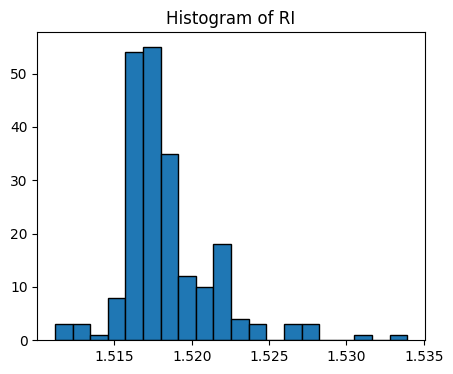

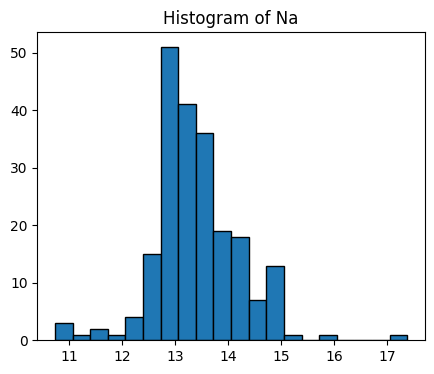

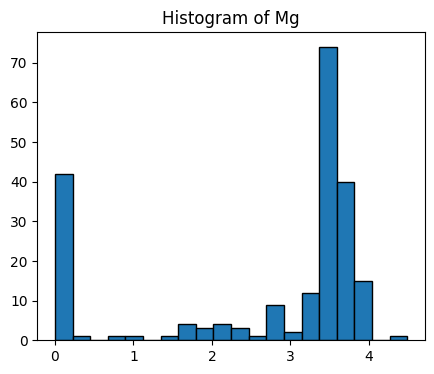

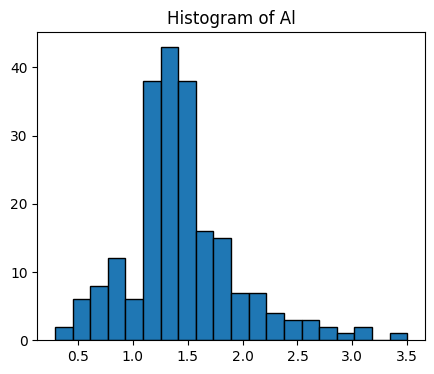

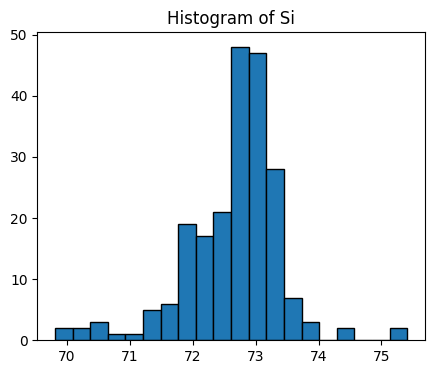

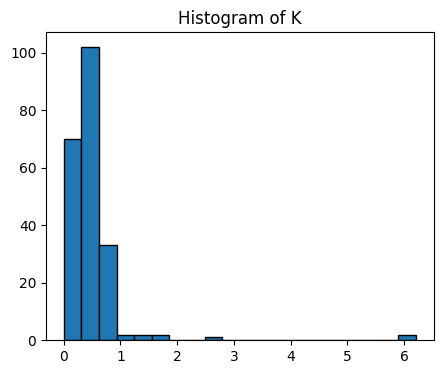

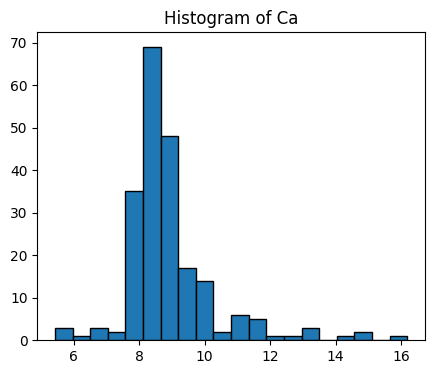

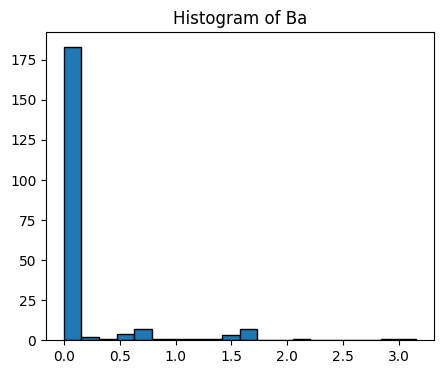

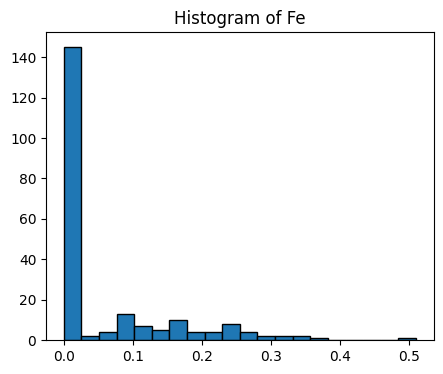

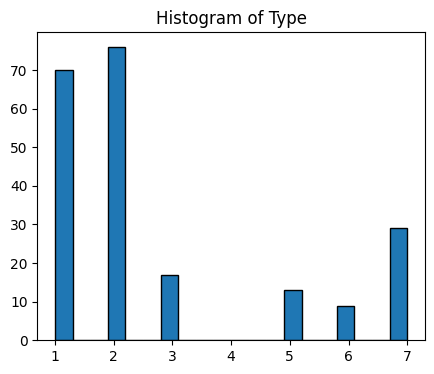

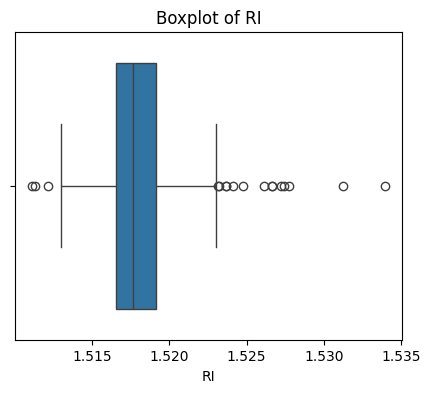

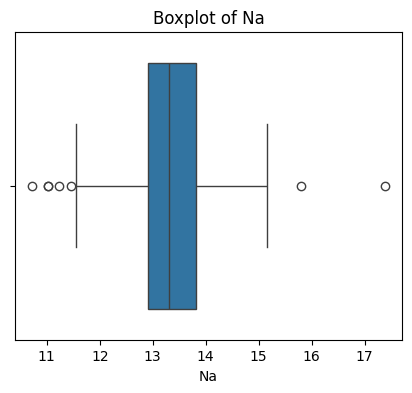

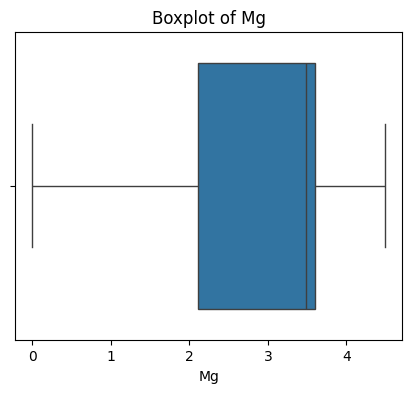

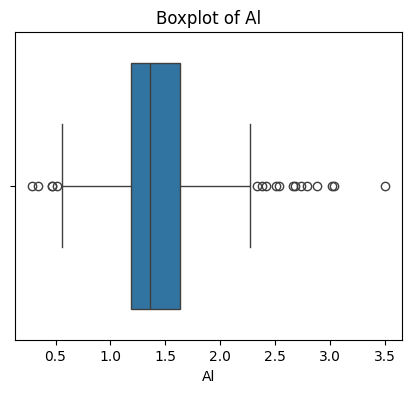

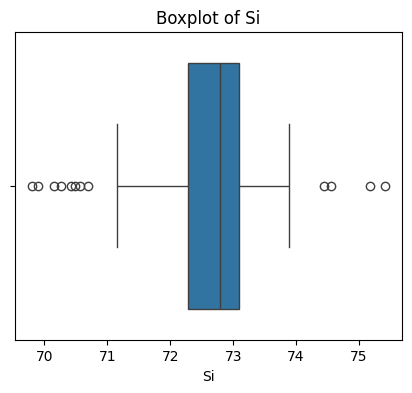

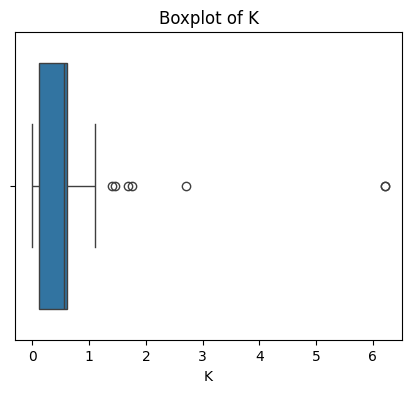

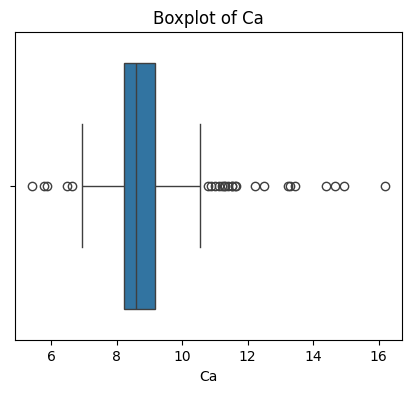

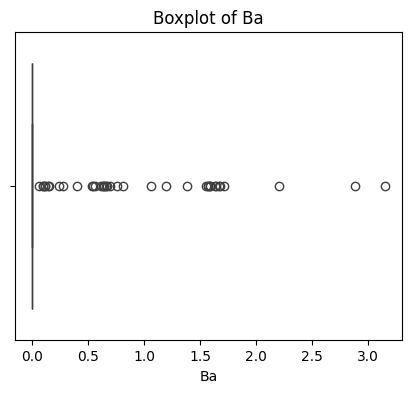

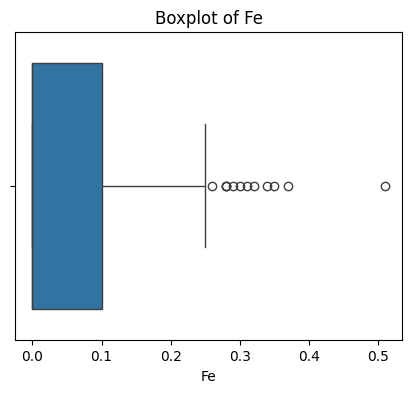

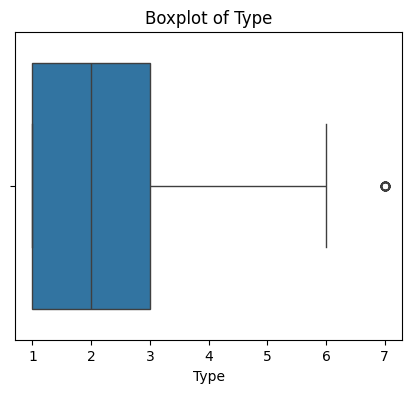

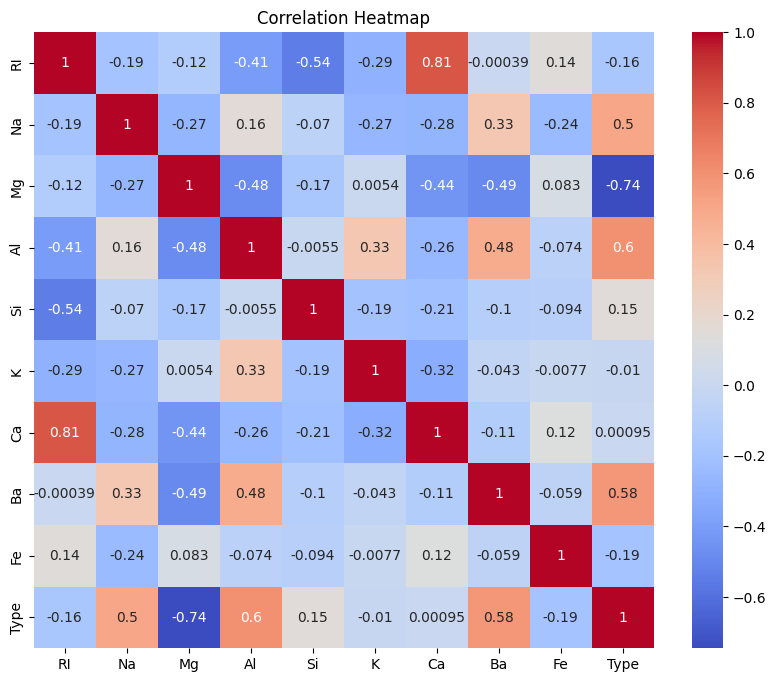

In [4]:

os.makedirs("outputs/histograms", exist_ok=True)
os.makedirs("outputs/boxplots", exist_ok=True)
os.makedirs("outputs/heatmaps", exist_ok=True)

# Histograms
for col in df_raw.columns:
    plt.figure(figsize=(5,4))
    plt.hist(df_raw[col], bins=20, edgecolor="black")
    plt.title(f"Histogram of {col}")
    path = f"outputs/histograms/{col}_hist.png"
    plt.savefig(path)
    plt.show()
    plt.close()

# Boxplots
for col in df_raw.columns:
    plt.figure(figsize=(5,4))
    sns.boxplot(x=df_raw[col])
    plt.title(f"Boxplot of {col}")
    path = f"outputs/boxplots/{col}_boxplot.png"
    plt.savefig(path)
    plt.show()
    plt.close()

# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_raw.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.savefig("outputs/heatmaps/correlation_heatmap.png")
plt.show()
plt.close()


## 4. Preprocessing (Scaling + SMOTE)

In [5]:

# Remove duplicates
df = df_raw.drop_duplicates()

# Handle missing values
df = df.fillna(df.mean())

# Split features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Handle imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

df_clean = pd.concat([X_resampled, y_resampled], axis=1)

os.makedirs("data/processed", exist_ok=True)
df_clean.to_csv("data/processed/cleaned_glass.csv", index=False)

print("Preprocessing complete. Final shape:", df_clean.shape)


Preprocessing complete. Final shape: (456, 10)


## 5. Model Training & Evaluation

In [6]:

X = df_clean.iloc[:, :-1]
y = df_clean.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

def evaluate(model, name):
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1:", f1_score(y_test, y_pred, average='weighted'))
    print(classification_report(y_test, y_pred))

# Random Forest
rf = RandomForestClassifier(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)
evaluate(rf, "Random Forest")

# Bagging
bag = BaggingClassifier(n_estimators=50, random_state=42)
bag.fit(X_train, y_train)
evaluate(bag, "Bagging")

# Boosting
boost = AdaBoostClassifier(n_estimators=80, random_state=42)
boost.fit(X_train, y_train)
evaluate(boost, "Boosting")



Random Forest
Accuracy: 0.9347826086956522
Precision: 0.9366836408476434
Recall: 0.9347826086956522
F1: 0.9350742517304397
              precision    recall  f1-score   support

           1       0.81      0.87      0.84        15
           2       0.93      0.87      0.90        15
           3       0.93      0.93      0.93        15
           5       0.94      1.00      0.97        16
           6       1.00      1.00      1.00        16
           7       1.00      0.93      0.97        15

    accuracy                           0.93        92
   macro avg       0.94      0.93      0.93        92
weighted avg       0.94      0.93      0.94        92


Bagging
Accuracy: 0.9021739130434783
Precision: 0.9074658025265442
Recall: 0.9021739130434783
F1: 0.9001307771559743
              precision    recall  f1-score   support

           1       0.78      0.93      0.85        15
           2       0.91      0.67      0.77        15
           3       1.00      0.93      0.97        1